# JWST NIRCam SIRS Correction

Bernard J. Rauscher<br>
NASA Goddard Space Flight Center, Greenbelt, MD 20771

29 July 2021

This example shows how to SIRS correct JWST NIRCam full-frame data using a previously computed SIRS calibration file.

In [1]:
# Standard python packages
from glob import glob
from astropy.io import fits
import numpy as np
from os import getenv
from PIL import Image

import sirspy

In [2]:
# Instantiate a SIRS object
sirs = sirspy.SIRS(getenv('HOME') + '/Library/JWST/NIRCam/20151217_nircam_sirs.h5')

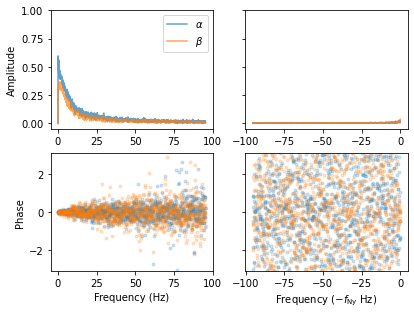

In [3]:
# Make some plots to show that it imported correctly. NIRCam's outputs are
# numbered 0-3 in SIRS.
output = 1 # Select an output
sirs.plot(output); # Plot it

In [4]:
# Just look at one
ddir = '/local/data/racy1/brausche/JWST/NIRCam/'
file = glob(ddir+'*.fits')[-1];

In [5]:
# Read in data 
with fits.open(file) as hdul:
    D_sirs = np.float64(hdul[0].data)
D_rows = D_sirs.copy() # Make a copy for rowsonly correction to compare

In [6]:
# Reference correct in place. This overwrites the input data.
sirs.refcor(D_sirs)                # SIRS correction
sirs.refcor(D_rows, rowsonly=True) # Rows only

Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2
Boink1
Boink1
Boink2
Boink2

Fit straight lines using Legendre polynomials. If $s$ is signal and $z$ is up-the-ramp sample index projected to the range over which the Legendre polynomials are defined, the following fits,

<center>$s(z) = \lambda_0 P_0(z) + \lambda_1 P_1(z)\hspace{18pt}(1)$,</center>

where $P_m(z)$ are the Legendre polynomials. The integrated charge during the exposure is give by $2\lambda_1$. One could equivalently fit,

<center>$s(z) = a_0 z^0 + a_1 z^1\hspace{18pt}(2)$,</center>

but I already have the tools to efficiently do Legendre fitting.

In [7]:
# Fit integrated counts. The units are DN. For the SIRS image, the median value is about 21 DN.
Λ = sirspy.Legendre(108,1) # 108 frames, 1st degree Legendre fit

# SIRS
sirs_cnts = 2*Λ.legfit(D_sirs)[1] # Integrated counts in DN

# Rows only
rows_cnts = 2*Λ.legfit(D_rows)[1] # ...

In [8]:
# Save
fits.PrimaryHDU(sirs_cnts).writeto(getenv('HOME')+'/tmp/sirs.fits', overwrite=True)
fits.PrimaryHDU(rows_cnts).writeto(getenv('HOME')+'/tmp/rows.fits', overwrite=True)

For presentation purposes, make a PNG that compares the lower-left corner.

In [9]:
# Extract region of interest
roi = np.zeros((1080,1920), dtype=np.float)
roi[:1080,:1920//2] = rows_cnts[:1080,:1920//2]
roi[:1080,1920//2:] = np.fliplr(sirs_cnts[:1080,:1920//2])

In [10]:
# Scale it for PNG

# Grey range of interest
μ = np.median(roi)
min,max = μ-2.5,μ+2.5

# Scale it
roi[roi<min] = min
roi[roi>max] = max
roi -= min
roi /= roi.max()
roi = np.uint8(255*roi)

# Make separator line
roi[:,1920//2-2:1920//2+3] = 255

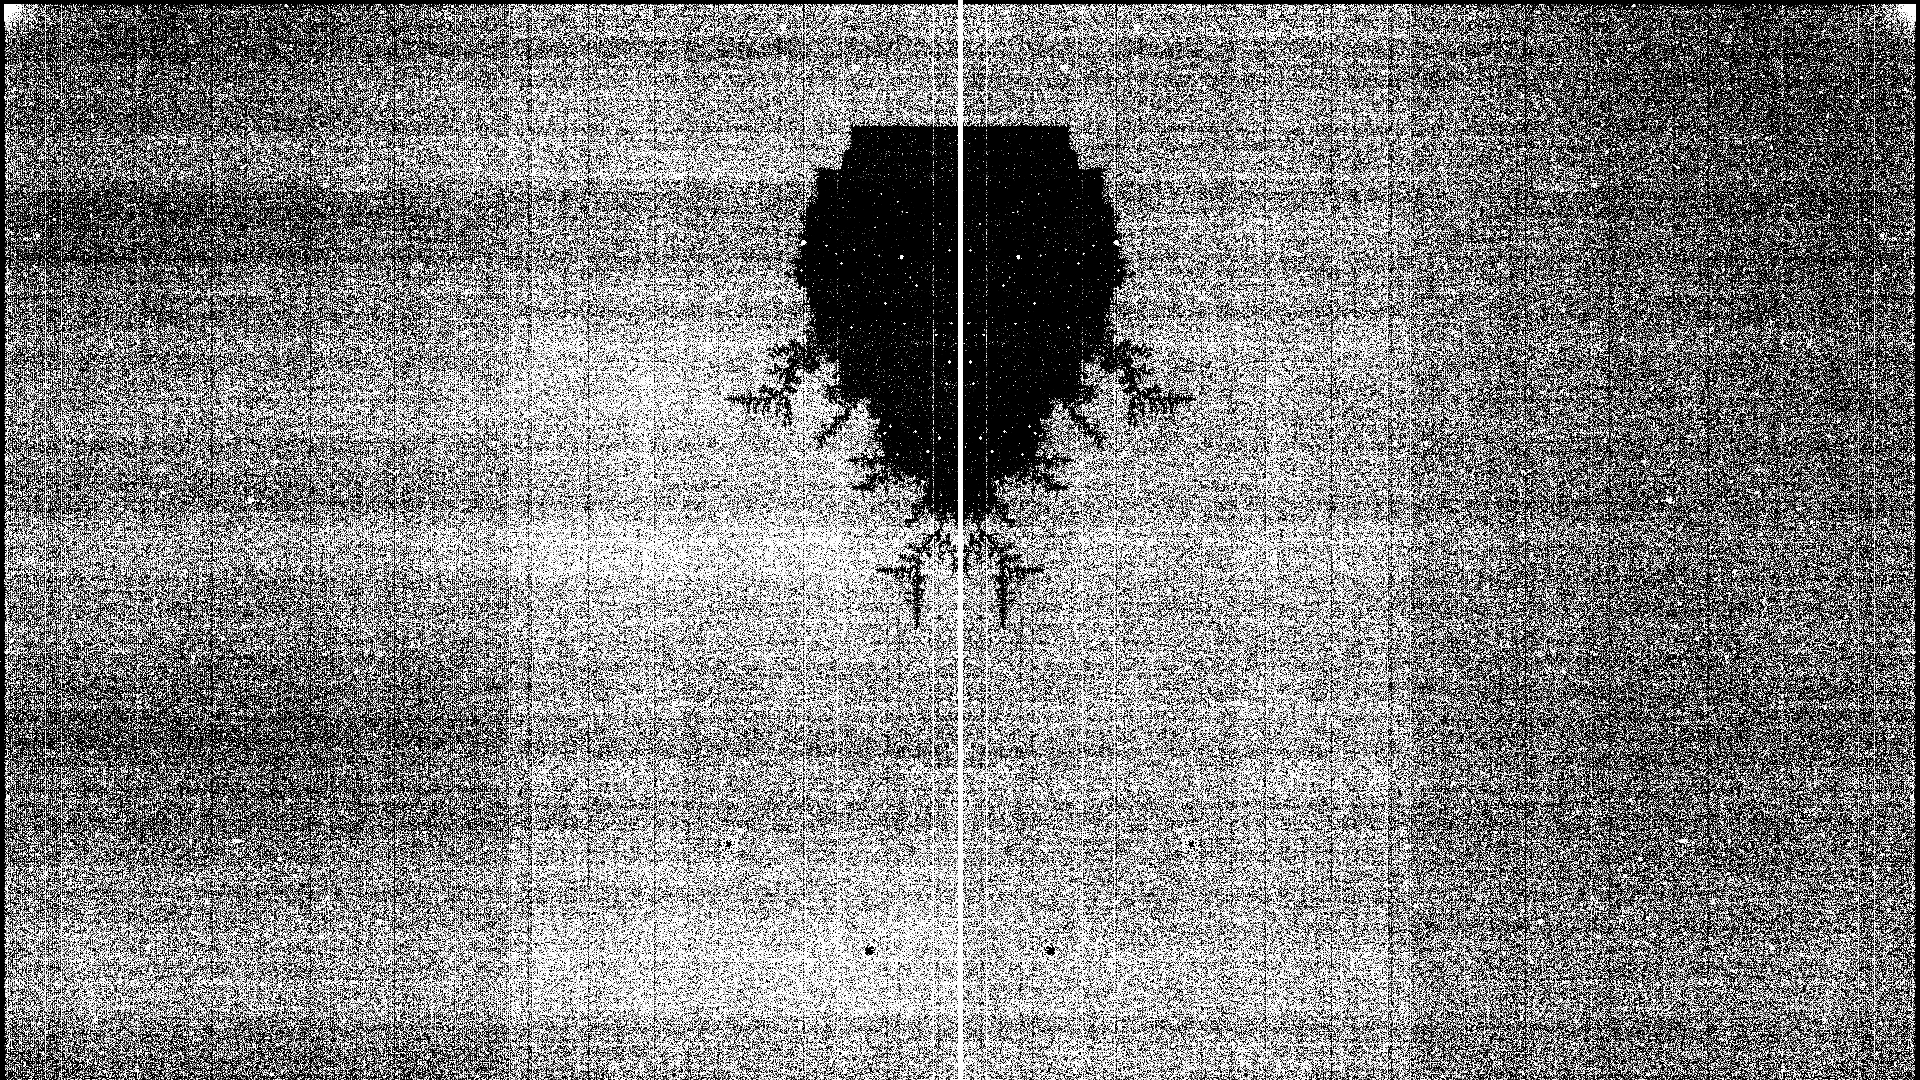

In [11]:
# Make image
im = Image.fromarray(roi)

# Save it
im.save(getenv('HOME')+'/tmp/20210729_nircam_comparison.png')

# Display it
im